# Week 05 Classification Evaluation Lab

- Course: Z604 Music Data Mining 
- Instructor: Kahyun Choi 

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [ ]:
# Common imports
import os
import numpy as np
from copy import deepcopy

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

# 1) Loading and exploring MNIST 

In [ ]:
def sort_by_target(mnist):
    _mnist = deepcopy(mnist)
    reorder_train_idx = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test_idx = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    _mnist.data[:60000] = mnist.data.iloc[reorder_train_idx]
    _mnist.target[:60000] = mnist.target.iloc[reorder_train_idx]
    _mnist.data[60000:] = mnist.data.iloc[reorder_test_idx + 60000]
    _mnist.target[60000:] = mnist.target.iloc[reorder_test_idx + 60000]
    return _mnist

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
mnist = sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
# A data key containing an array with one row per instance and one column per feature 
# A target key containing an array with the labels    
mnist["data"], mnist["target"] 

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel1

In [ ]:
mnist.DESCR # A DESCR key describing the dataset

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
28*28

784

In [ ]:
# use .iloc() method to access a specific row of a dataframe given its index
type(X.iloc[36000])

pandas.core.series.Series

In [ ]:
# use .to_numpy() method to convert a series (`pandas.core.series.Series`) instance
# to familiar numpy array (`numpy.ndarray`)
type(X.iloc[36000].to_numpy())

numpy.ndarray

In [ ]:
X.iloc[36000].shape

(784,)

In [ ]:
X.iloc[36000].to_numpy()

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

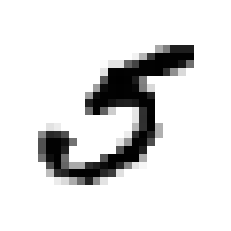

In [ ]:
some_digit = X.iloc[36000].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

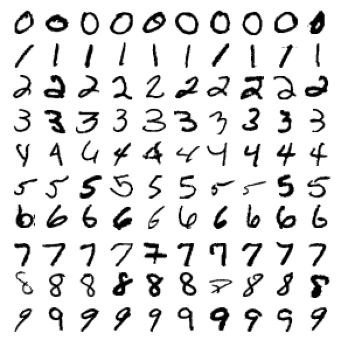

In [ ]:
plt.figure(figsize=(6,6))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [ ]:
y[36000]

5

In [ ]:
type(y[36000])

numpy.int8

### Train/test split and shuffle

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# shffule our training samples
from sklearn.utils import shuffle
X_train, y_train = shuffle (X_train, y_train)

# 2) Binary classifier

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
y_train_5

12628    False
37730    False
39991    False
8525     False
8279     False
         ...  
54343    False
38158    False
860      False
15795    False
56422    False
Name: class, Length: 60000, dtype: bool

In [ ]:
unique, counts = np.unique(y_train_5, return_counts=True)
dict(zip(unique, counts))

{False: 54579, True: 5421}

**Note**: a few hyperparameters will have a different default value in future versions of Scikit-Learn, so a warning is issued if you do not set them explicitly. This is why we set `max_iter=5` and `tol=-np.infty`, to get the same results as in the book, while avoiding the warnings.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'log', max_iter=100, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=-inf)

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = sgd_clf.predict(X_train)
accuracy_score(y_train_5, y_train_pred)

0.9551333333333333

In [ ]:
some_digit.shape

(784,)

In [ ]:
# `some_digit` is 5, and our binary classifier does it job, great!
# your output may not be True `(array([ True]))`, but it is ok because it is a pretty naive classifier
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([False])

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = np.zeros((len(y_train_5), 1), dtype=bool)
accuracy_score(y_train_5, y_train_pred)

0.90965

In [ ]:
y_train_pred = sgd_clf.predict(X_train)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[54455,   124],
       [ 2568,  2853]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


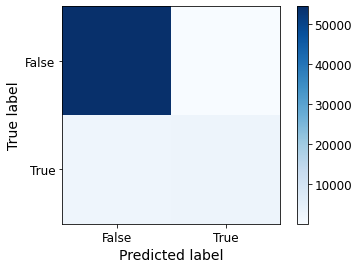

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(sgd_clf, X_train, y_train_5,
                             #display_labels=class_names,
                             cmap=plt.cm.Blues, include_values = False)
#                             normalize=normalize)

In [ ]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [ ]:
y_train_perfect_predictions = y_train_5

In [ ]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.9583473295263688

In [ ]:
cm[1,1] / (cm[1,1] + cm[0,1])

0.9583473295263688

In [ ]:
recall_score(y_train_5, y_train_pred)

0.5262866629773104

In [ ]:
cm[1,1] / (cm[1,1] + cm[1,0])

0.5262866629773104

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.679447487497023

In [ ]:
cm[1,1] / (cm[1,1] + (cm[0,1] + cm[1,0])/2)

0.6794474874970231

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([-2151.83227173])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([False])

In [ ]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = sgd_clf.decision_function(X_train)

In [ ]:
y_scores

array([ -10667.28567596, -102281.69511889,  -30671.36949534, ...,
        -57165.6839192 ,  -34798.79631546,  -11158.49804094])

In [ ]:
sgd_clf.classes_

array([False,  True])

In [ ]:
y_scores.shape

(60000,)

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
thresholds

array([-89152.99738345, -89108.55905783, -89039.40621453, ...,
        26835.80096054,  28424.18109566,  28992.98011204])

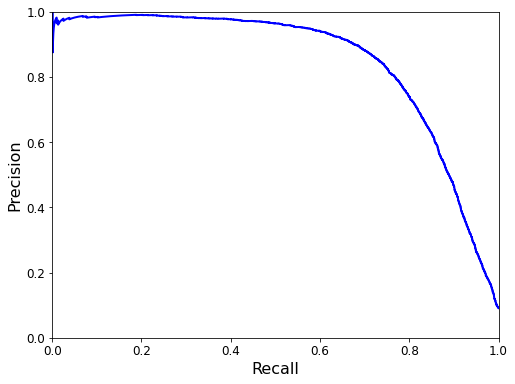

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# ROC curves

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

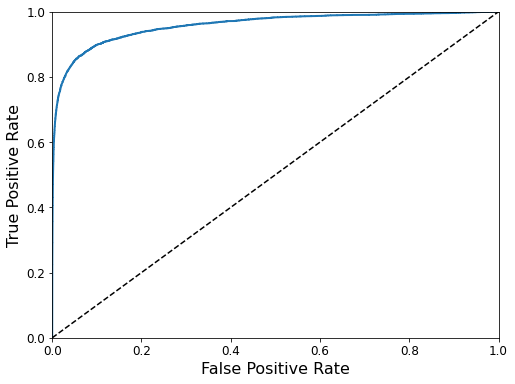

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [ ]:
tpr=np.ones(tpr.size)
fpr=np.ones(fpr.size)

In [ ]:
tpr

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9582918412573426

## Dummy (ie. random) classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
dmy_clf.fit(X_train, y_train)
y_probas_dmy = dmy_clf.predict_proba(X_train)
y_scores_dmy = y_probas_dmy[:, 1]

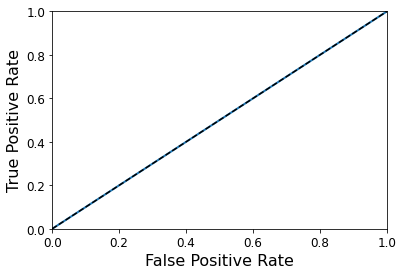

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

# 3) Multiclass classification only using the training set

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'log', max_iter=100, tol=-np.infty, random_state=42)

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=int8)

### Confusion Matrix

In [ ]:
y_train_pred = sgd_clf.predict(X_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5758,    1,   20,    6,    0,   77,   20,    1,   25,   15],
       [   2, 6441,   45,   31,    3,   46,   11,   19,  127,   17],
       [  55,   19, 5323,   62,   15,  145,   81,   57,  179,   22],
       [  33,   10,  160, 4869,    1,  831,   25,   34,  101,   67],
       [  21,   20,   70,   41, 4413,  277,   99,   53,  216,  632],
       [  45,    1,   28,   68,   13, 5048,   41,    3,  121,   53],
       [  34,    9,   27,    0,    8,  284, 5529,    1,   22,    4],
       [  30,    7,   54,   43,   21,   92,    7, 5486,   51,  474],
       [  32,   64,   51,  233,    3, 1028,   46,   27, 4228,  139],
       [  38,   10,   16,   70,   22,  230,    2,  133,   37, 5391]])

In [ ]:
conf_mx.diagonal()

array([5758, 6441, 5323, 4869, 4413, 5048, 5529, 5486, 4228, 5391])

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

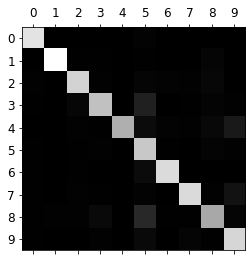

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.yticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.show()

### Normalized Confusion Matrix

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

<Figure size 1440x72 with 0 Axes>

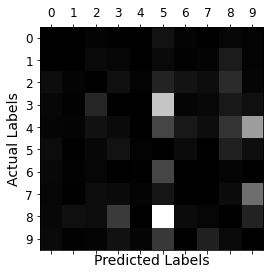

In [ ]:
fig = plt.figure(figsize=(20, 1))
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.yticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.show()

### Anlayzing individual errors

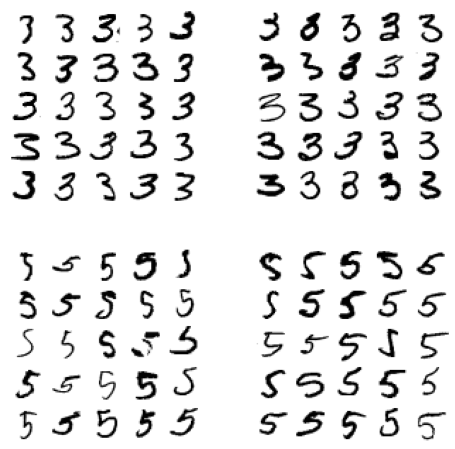

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].to_numpy(), images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].to_numpy(), images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].to_numpy(), images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].to_numpy(), images_per_row=5)
plt.show()

## Precisions and Recalls

In [ ]:
from sklearn.metrics import classification_report

# Print the precision and recall, among other metrics
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5923
           1       0.98      0.96      0.97      6742
           2       0.92      0.89      0.91      5958
           3       0.90      0.79      0.84      6131
           4       0.98      0.76      0.85      5842
           5       0.63      0.93      0.75      5421
           6       0.94      0.93      0.94      5918
           7       0.94      0.88      0.91      6265
           8       0.83      0.72      0.77      5851
           9       0.79      0.91      0.84      5949

    accuracy                           0.87     60000
   macro avg       0.89      0.87      0.87     60000
weighted avg       0.89      0.87      0.88     60000



In [ ]:
conf_mx[5,5]/np.sum(conf_mx[5,:]) # Recall of class 5

0.9311935067330751

In [ ]:
conf_mx[5,5]/np.sum(conf_mx[:,5]) # Precision of class 5

0.6264581782079921

In [ ]:
np.sum(conf_mx[5,:])

5421

# 4) Multiclass classification evaluation using the test set

### Confusion Matrix

In [ ]:
y_test_pred = sgd_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

array([[ 954,    0,    2,    1,    0,   14,    3,    2,    3,    1],
       [   1, 1094,    3,    4,    0,    5,    6,    2,   19,    1],
       [   9,    4,  911,    8,    2,   16,   15,    7,   55,    5],
       [   7,    0,   21,  805,    0,  146,    3,    8,   11,    9],
       [   2,    0,   13,    9,  727,   42,   28,   10,   45,  106],
       [   8,    1,    0,   13,    3,  831,    4,    1,   24,    7],
       [  16,    3,    9,    0,    3,   58,  867,    0,    2,    0],
       [   4,    6,   19,    5,    1,   18,    1,  881,   12,   81],
       [   8,    6,    3,   33,    4,  163,    8,   12,  715,   22],
       [   8,    5,    0,   12,    8,   39,    0,   22,   10,  905]])

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

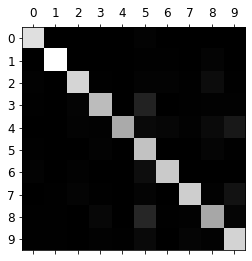

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.yticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.show()

### Normalized Confusion Matrix

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

<Figure size 1440x72 with 0 Axes>

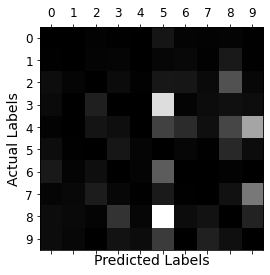

In [ ]:
fig = plt.figure(figsize=(20, 1))
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.yticks(np.arange(10), ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
plt.show()

### Analyzing individual errors

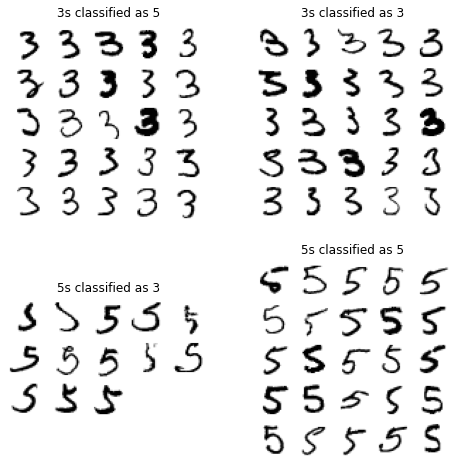

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_test[(y_test == cl_a) & (y_test_pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (y_test_pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (y_test_pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (y_test_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].to_numpy(), images_per_row=5)
plt.title('3s classified as 5')
plt.subplot(222); plot_digits(X_ab[:25].to_numpy(), images_per_row=5)
plt.title('3s classified as 3')
plt.subplot(223); plot_digits(X_ba[:25].to_numpy(), images_per_row=5)
plt.title('5s classified as 3')
plt.subplot(224); plot_digits(X_bb[:25].to_numpy(), images_per_row=5)
plt.title('5s classified as 5')
plt.show()

## Precisions and Recalls

In [ ]:
y_test_pred = sgd_clf.predict(X_test)

from sklearn.metrics import classification_report
# Print the precision and recall, among other metrics
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.93      0.88      0.91      1032
           3       0.90      0.80      0.85      1010
           4       0.97      0.74      0.84       982
           5       0.62      0.93      0.75       892
           6       0.93      0.91      0.92       958
           7       0.93      0.86      0.89      1028
           8       0.80      0.73      0.76       974
           9       0.80      0.90      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
conf_mx[5,5]/np.sum(conf_mx[5,:]) # Recall of class 5

0.9316143497757847

In [ ]:
conf_mx[5,5]/np.sum(conf_mx[:,5]) # Precision of class 5

0.6238738738738738

In [ ]:
np.sum(conf_mx[5,:])

892

### Generating two gaussian distributions for the slides

## Great Classifier

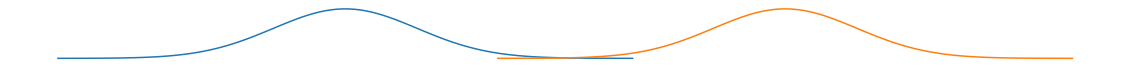

In [ ]:
import scipy.stats as stats
import math

plt.figure(figsize=(20, 1))

mu = 0
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = 15
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axis('off')
plt.show()

## Okay Classifier

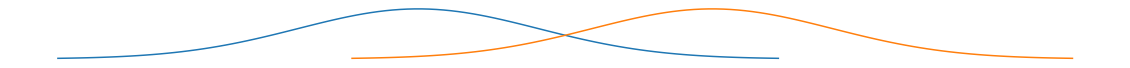

In [ ]:
import scipy.stats as stats
import math

plt.figure(figsize=(20, 1))

mu = 0
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = 6
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axis('off')
plt.show()

## Random Classifier

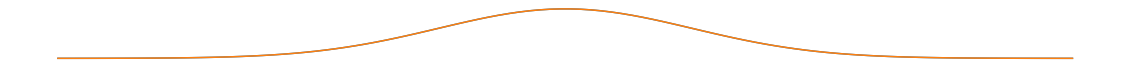

In [ ]:
import scipy.stats as stats
import math

plt.figure(figsize=(20, 1))

mu = 0
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = 0
variance = 6
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axis('off')
plt.show()